In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

# Optuna fitting

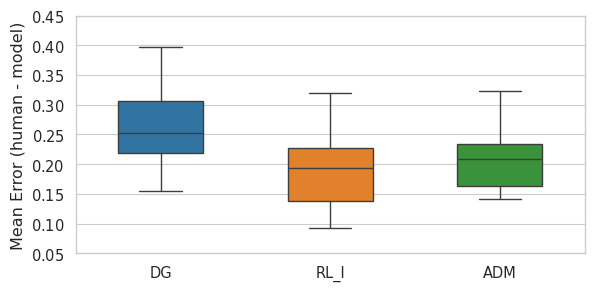

In [2]:
dg = pd.read_pickle("data/DG_yoo_apr1_performance.pkl")
rl_l = pd.read_pickle("data/RL_l_yoo_apr2_performance.pkl")
adm = pd.read_pickle("data/ADM_yoo_apr2_performance.pkl")
combined = pd.concat([dg, rl_l, adm], ignore_index=True)

with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,3), sharex=True)
    sns.boxplot(combined, x='type', y='loss', hue='type', ax=axes, palette=palette[:3], notch=False, width=0.5)
    axes.set(xlabel=None, ylabel='Mean Error (human - model)', ylim=[0.05, 0.45]) 
    plt.tight_layout()
    fig.savefig("plots/yoo_performance.jpg", dpi=600)

# Parameters

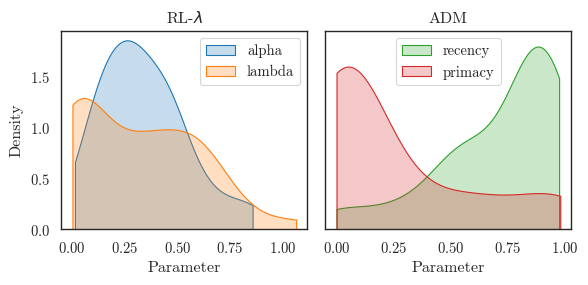

In [3]:
rl_l = pd.read_pickle("data/RL_l_yoo_apr2_params.pkl")
adm = pd.read_pickle("data/ADM_yoo_apr2_params.pkl")
combined = pd.concat([rl_l, adm], ignore_index=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6,3), sharey=True)
sns.kdeplot(combined, x='alpha', ax=axes[0], color=palette[0], fill=True, common_norm=False, label='alpha', cut=0)
sns.kdeplot(combined, x='lambda', ax=axes[0], color=palette[1], fill=True, common_norm=False, label='lambda', cut=0)
sns.kdeplot(combined, x='recency', ax=axes[1], color=palette[2], fill=True, common_norm=False, label='recency', cut=0)
sns.kdeplot(combined, x='primacy', ax=axes[1], color=palette[3], fill=True, common_norm=False, label='primacy', cut=0)
axes[0].set(ylabel='Density', xlabel="Parameter", title=r"RL-$\lambda$")
axes[1].set(ylabel=None, xlabel="Parameter", title="ADM")
axes[0].legend()
axes[1].legend()
# axes[1].get_legend().remove()
# axes[2].get_legend().remove()
# axes[3].set(ylabel=None)
plt.tight_layout()